# Part 3 - Naive Bayes

<div class="alert-success">
Nama :Arif Su'admaji
</div>

<div class="alert-danger">
Github : https://github.com/arifsuadmaji
</div>

<div class="alert-warning">
Pengantar Data Mining
</div>

<div class="alert-info">
2023
</div

# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

#Model naive bayes
from sklearn.naive_bayes import GaussianNB

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Input Data

In [2]:
df = pd.read_csv('./data/mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Check Missing Value

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Check imbalance dataset

In [5]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# Train-Test Split

In [6]:
X = df.drop(columns='price_range')
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1800, 20), (200, 20), (1800,), (200,))

In [7]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# Scaling

In [9]:
columns = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt','fc',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

#  Model

In [10]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Evaluate model

In [11]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 2, 3, 1, 1, 3, 0, 2, 0, 3, 2, 1, 0, 3, 3, 1, 3, 2, 2, 3,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 2, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 2, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 3, 1, 1, 2, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0], dtype=int64)

In [12]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.825


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.76      0.76      0.76        50
           2       0.69      0.66      0.67        47
           3       0.88      0.95      0.91        61

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  4,  0,  0],
       [ 1, 38, 11,  0],
       [ 0,  8, 31,  8],
       [ 0,  0,  3, 58]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

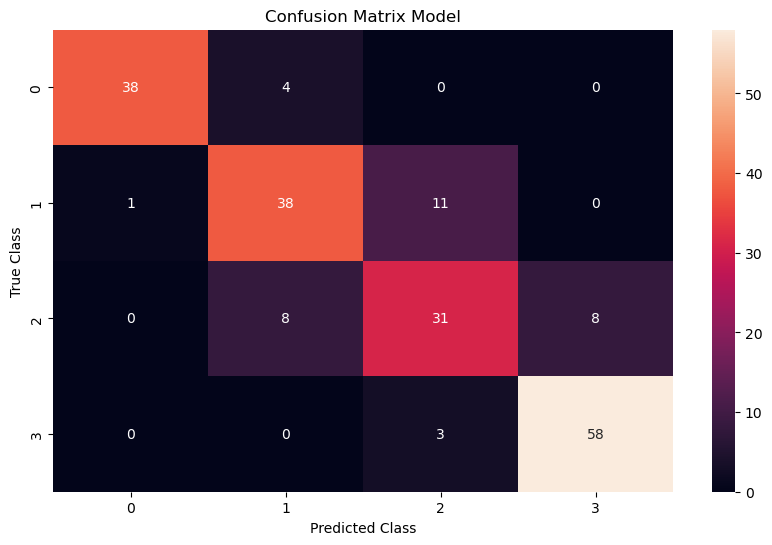

In [15]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")